<a href="https://colab.research.google.com/github/William3265/-/blob/master/%E7%92%B0%E5%A2%83%E5%BB%BA%E7%BD%AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
url ="https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv"
data = pd.read_csv(url)
data
#y= w*x+b
x = data["YearsExperience"]
y = data["Salary"]
x

In [4]:
!pip install wget
import wget
wget.download("https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf")

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=7b50933e02fb72f7e471467e745a32629713c051efba60df3af928dd0efe446f
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


'ChineseFont.ttf'

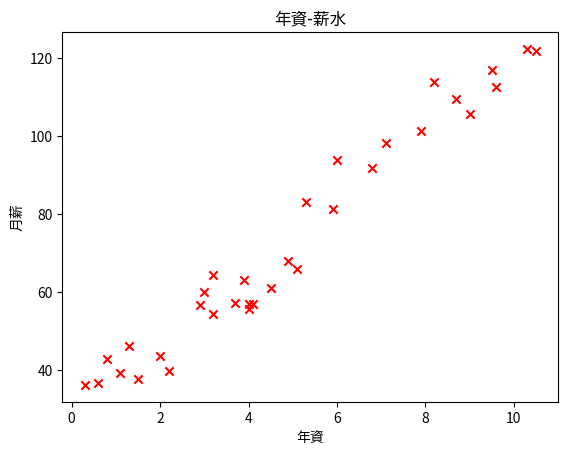

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mlp
from matplotlib.font_manager import fontManager
fontManager.addfont("ChineseFont.ttf")
mlp.rc('font', family="ChineseFont")
plt.scatter(x,y, marker="x", color="red")
plt.title("年資-薪水")
plt.xlabel("年資")
plt.ylabel("月薪")
plt.show()

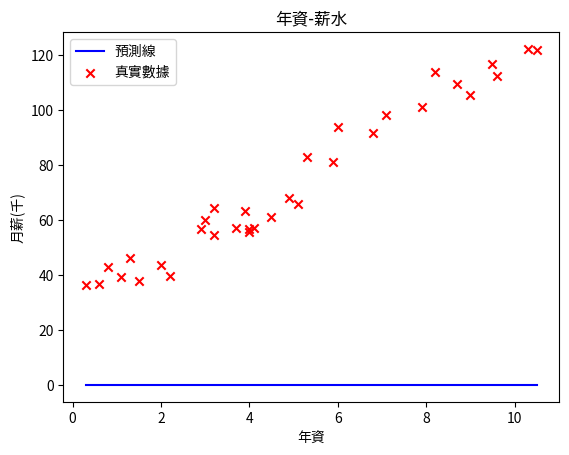

In [11]:
w=0
b=0
#預測線
y_pred = x*w+b
plt.plot(x, y_pred, color="blue", label="預測線")
#將x,y圖疊上來
plt.scatter(x,y, marker="x", color="red", label="真實數據")
plt.title("年資-薪水")
plt.xlabel("年資")
plt.ylabel("月薪(千)")
#=============
plt.legend()
plt.show()

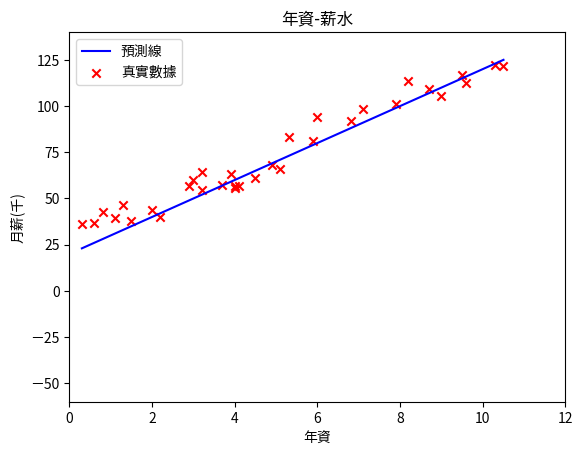

In [45]:
w=0
b=0
def plot_pred(w,b):
  #預測線
  y_pred = x*w+b
  plt.plot(x, y_pred, color="blue", label="預測線")
  #將x,y圖疊上來
  plt.scatter(x,y, marker="x", color="red", label="真實數據")
  plt.title("年資-薪水")
  plt.xlabel("年資")
  plt.ylabel("月薪(千)")
  plt.xlim([0,12])
  plt.ylim([-60,140])
  #=============
  plt.legend()
  plt.show()
plot_pred(10,20)

In [46]:
from ipywidgets import interact
interact(plot_pred,w=(-100,100,1),b=(-100,100,1))
#下面用窮舉法找出w,b 可以證明w=9, b=29 時有最小的cost 32.69

interactive(children=(IntSlider(value=0, description='w', min=-100), IntSlider(value=0, description='b', min=-…

<function __main__.plot_pred(w, b)>

#怎樣是最適合資料的直線呢?
成本函數 Cost Function
cost = (真實數據-預測值)^2

In [47]:
w=10
b=0
y_pred = w*x +b
cost = (y- y_pred)**2
cost = cost.sum()/len(x)
cost

602.547878787879

In [48]:
w=10
b=0
def compute_cost(x,y,w,b): #把以上寫成函數compute_cost，等下要用窮舉法將所有的w,b畫出來就可以找到最小的值
  y_pred = w*x +b
  cost = (y- y_pred)**2
  cost = cost.sum()/len(x)
  return cost
compute_cost(x,y,10,0) #先設定w=10, b=0 和上面一樣

602.547878787879

In [ ]:
# 先設b=0, w=-100~100 cost 會是多少
costs = []
for w in range(-100,101):
  cost= compute_cost(x,y,w,0)
  costs.append(cost)
costs

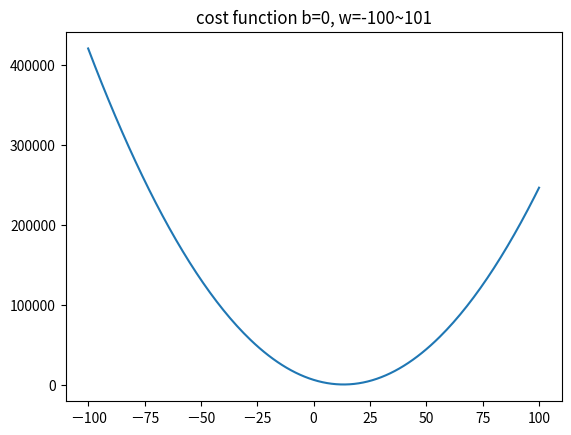

In [50]:
import matplotlib.pyplot as plt
#plt.scatter(range(-100,101), costs)
plt.plot(range(-100,101), costs)
plt.title("cost function b=0, w=-100~101")
plt.show()

In [53]:
#w=-100~100 b=-100~100 的cost
import numpy as np
ws= np.arange(-100,101)
bs= np.arange(-100,101)
costs = np.zeros((201,201)) #創建numpy 201個都是0的二維矩陣
i= 0
for w in ws:
  j= 0
  for b in bs:
    cost= compute_cost(x,y,w,b)
    costs[i,j] =cost
    j=j+1
  i=i+1
costs

array([[543097.74787879, 541777.28121212, 540458.81454545, ...,
        320651.34787879, 319726.88121212, 318804.41454545],
       [534727.50939394, 533416.80636364, 532108.10333333, ...,
        314214.30939394, 313299.60636364, 312386.90333333],
       [526422.82181818, 525121.88242424, 523822.9430303 , ...,
        307842.82181818, 306937.88242424, 306034.9430303 ],
       ...,
       [164229.90787879, 164842.64121212, 165457.37454545, ...,
        324557.10787879, 325565.84121212, 326576.57454545],
       [168838.74939394, 169461.24636364, 170085.74333333, ...,
        331099.14939394, 332117.64636364, 333138.14333333],
       [173513.14181818, 174145.40242424, 174779.6630303 , ...,
        337706.74181818, 338735.00242424, 339765.2630303 ]])

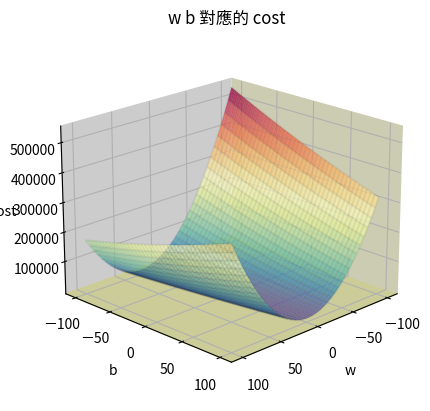

when w=[9], b=[29] 會有最小cost: [32.69484848]


In [91]:
#要同時將w,b 畫出來，要畫一個3D圖
ax = plt.axes(projection="3d")
ax.view_init(20,45)
ax.xaxis.set_pane_color((0.8,0.8,0.7))
ax.yaxis.set_pane_color((0.8,0.8,0.8))
ax.zaxis.set_pane_color((0.8,0.8,0.6))
bgrid,wgrid = np.meshgrid(bs,ws)
#傳入plot_surface是要傳二維網格不是單一矩陣，網址如下
#https://wangyeming.github.io/2018/11/12/numpy-meshgrid/
ax.plot_surface(wgrid,bgrid,costs, cmap="Spectral_r", alpha=0.7)
ax.plot_wireframe(wgrid, bgrid, costs, color="black", alpha =0.05)
ax.set_title("w b 對應的 cost")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("cost")
w_idx, b_idx = np.where(costs == np.min(costs))
plt.show()
print(f"when w={ws[w_idx]}, b={ws[b_idx]} 會有最小cost: {costs[w_idx, b_idx]}")